In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Differential Equations

## First Order ODEs

Air friction while falling

### $$v'-3 v^2 + 5 = 0   \qquad  v(0)=0$$

as we know, $v$ is a function of time $t$

All information about differential equation

In [16]:
def dvdt(v, t):
    return 3*v**2 - 5

Solve differential equation

In [4]:
from scipy.integrate import odeint 

In [22]:
t = np.linspace(0, 1, 100)
v = odeint(dvdt, 0, t)

In [23]:
v.shape

(100, 1)

Plot

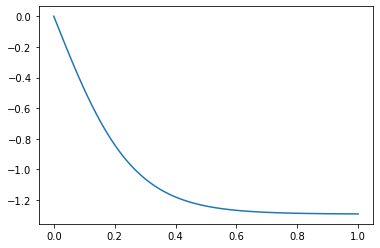

In [24]:
plt.plot(t, v)

### The odeint takes the $dv/dt$ function as a parameter, and returns the $v$ values respect to corresponding $t$ parameter

### Coupled first order ODEs

### $$y_{1}' = y_{1} + y_{2}^2 + 3x \qquad y_{1}(0) = 0$$

### $$y_{2}' = 3y_{1} + y_{2}^3 - cos(x) \qquad y_{2}(0) = 0$$

Letting $S = (y_1, y_2)$, we need to write a function that returns $dS/dx = (dy_{1}/dx, dy_{2}/dx)$. The function $dS/dx$ can take in $S = (y_1, y_2)$ and $x$

In [39]:
def dsdx(s, x):
    y1, y2 = s
    return [y1 + y2 **2 + 3*x, 3*y1 + y2**3 - np.cos(x)]
s_0 = (0, 0)

In [40]:
x = np.linspace(0, 1, 100)
s = odeint(dsdx, s_0, x)
s.shape

(100, 2)

In [41]:
y1, y2 = s.T[0], s.T[1]

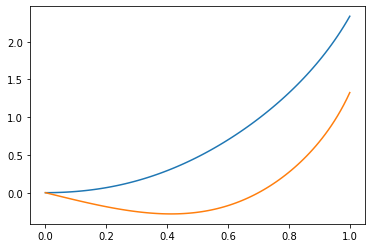

In [42]:
plt.plot(x, y1)
plt.plot(x, y2)

## Second Order ODEs

Euation for a pendulum

### $$\theta'' - sin(\theta)=0$$

Scipy can only sole coupled first order ODEs, but __any second order ODE can be turned into tow coupled first order ODEs.__ The same thing goes for higher order ODEs.

Define $\omega = d\theta / dt$ so that one has the following coupled ODEs

### $$d\omega / dt = sin(\theta)$$

### $$d\theta / dt = \omega$$

Let $S=(\theta, \omega)$

In [52]:
def dsdt(s, t):
    theta, omega = s
    return [omega, np.sin(theta)]
theta_0 = np.pi / 2
omega_0 = 0
s0 = (theta_0, omega_0)

In [53]:
t = np.linspace (0, 20, 100)
s = odeint(dsdt, s0, t)

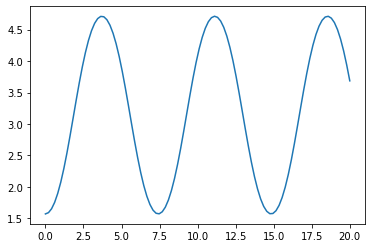

In [54]:
theta = s.T[0]
plt.plot(t, theta)

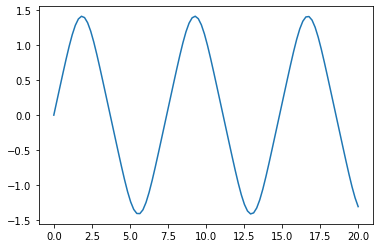

In [56]:
omega = s.T[1]
plt.plot(t, omega)

## Fourier Transforms

The discrete Fourier transform is defined as

### $$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k/N)} x[n]$$

$\bullet$ $k/N$ represents a specific frequency (dimensionless)

$\bullet$ can be converted to a frequency (Hz) if you know the spacing in x

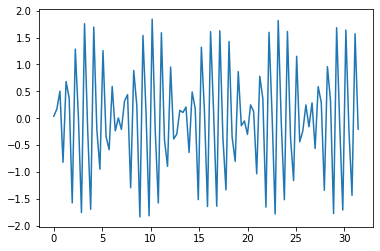

In [59]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*t) + np.sin(4 * np.pi* t) + 0.1 * np.random.randn(len(t))
plt.plot(t, x)

In [60]:
from scipy.fft import fft, fftfreq

In [69]:
N = len(x)
y = fft(x)
f = fftfreq(N, np.diff(t)[0])

In [80]:
y1 = y[:N//2]
f1 = f[:N//2]

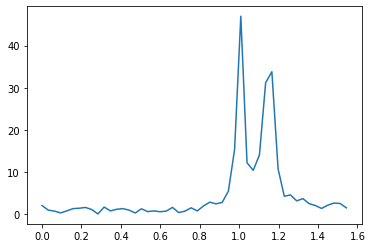

In [81]:
plt.plot(f1, abs(y1))

## Examples

__example 1.__ the energy required to get from point $\vec{r_1}$ to piont $\vec{r_2}$ for a plane is given by

## $$E = \alpha \int_c \mid \frac{d \vec{r}}{dt} \mid dt - \int_c \vec{F} \cdot \frac{d \vec{r}}{dt} dt$$

Suppose that $ \alpha = 5$ and our start and ends points are $\vec{r_1} = (0, 0)$ and $\vec{r_2} = (0, 10)$. On this particular day, the wind produces a force field $\vec{F} = (0, -2/(x+1)^2)$. Find the optimal value of A in $\vec{r}(t) = A sin(\pi t/10)\hat{x} + t \hat{y}$ that minimizes the work.

Then $x = A sin(\pi t/10)$, $y=t$, and

## $$ \mid \frac{d \vec{r}}{dt} \mid = \sqrt{ 1 + (\pi A /10)^2 cos^2(\pi t/10)}$$

## $$\vec{F} \cdot \frac{d \vec{r}}{dt} = \begin{bmatrix} 0 \\ -2/(Asin(\pi t/10) + 1)^2 \end{bmatrix} \cdot \begin{bmatrix} \pi A/10 cos(\pi t /10) \\ 1 \end{bmatrix} = -2/(A sin(\pi t/10)+1)^2  $$

so that

## $$ E = \int_{0}^{10} \begin{pmatrix} 5 \sqrt{1+(\pi A/10)^2cos^2(\pi t/10)} + \frac{2}{(A sin(\pi t/10) + 100)^2} \end{pmatrix}dt$$

In [83]:
from scipy.integrate import quad
from scipy.optimize import minimize

In [88]:
def eint(A):
    integrand = lambda t: 2/(A * np.sin(np.pi *t /10) + 100)**2 + 5 * np.sqrt( 1 + ((np.pi * A /10)**2) * (np.cos(np.pi * t /10))**2)
    return quad(integrand, 0, 10)[0]
a_opt = minimize(eint, 0.001, method="CG").x

In [90]:
a_opt[0]

1.0273584644753279e-05

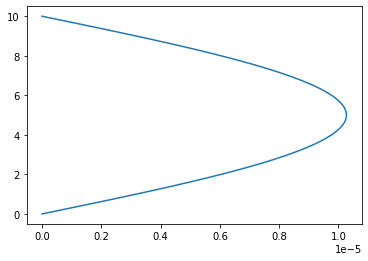

In [92]:
t = np.linspace(0, 10, 100)
x = a_opt * np.sin( np.pi * t /10)
y = t
plt.plot(x, y)